In [1]:
!pip install -q japanize-matplotlib 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import math

In [3]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [5]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


【問題1】2×2マスのチェス盤の小麦の数

In [16]:
small_board_ndarray = np.array(small_board_list)
small_board_ndarray = small_board_ndarray.reshape([2, 2])
print(f"2*2マスの板に小麦を並べる（ndarray）：\n{small_board_ndarray}")

2*2マスの板に小麦を並べる（ndarray）：
[[1 2]
 [4 8]]


【問題2】n×mマスへの拡張

In [52]:
def chessandwheat(n,m):
    """n×mマスのチェス盤の小麦の数の計算関数。

    Parameteres
    -----------
    n : int
        チェス盤の行
    m : int
        チェス盤の列

    Returns
    -------
    small_board_ndarray : int
        チェス盤の小麦の数(リスト)
    """
    n_squares = n * m
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(int(2*small_board_list[-1]))
    small_board_ndarray = np.array(small_board_list)
    small_board_ndarray = small_board_ndarray.reshape([n, m])
    # print(f"{n}*{m}マスの板に小麦を並べる（ndarray）：\n{small_board_ndarray}")
    return small_board_ndarray

In [53]:
print(f"小麦の総数：{np.sum(chessandwheat(8,8))/10**6:,}(100万)")

小麦の総数：18,446,744,073,709.55(100万)


【問題3】小麦の数の合計

In [54]:
wheats=chessandwheat(8,8)
print(f"小麦の総数：{np.sum(wheats)/10**6:,}(100万)")

小麦の総数：18,446,744,073,709.55(100万)


In [62]:
ans=0
ave=[]
for j in range(8):
    for i in range(8):
        ans += wheats[i][j]
        # print(wheats[i][j],end="**")
    ave.append(ans/8)
    ans=0
ave = np.array(ave)

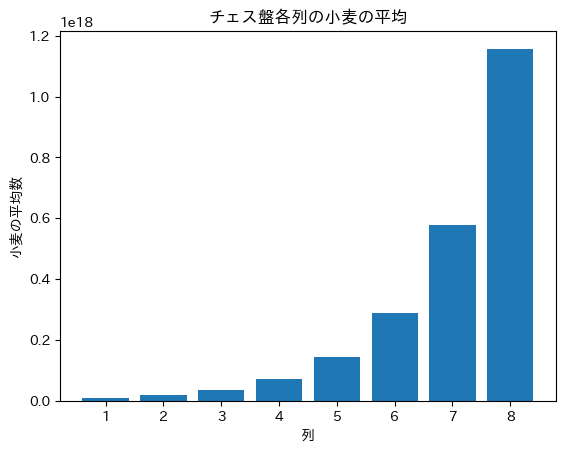

In [68]:
plt.xlabel("列")
plt.ylabel("小麦の平均数")
plt.title("チェス盤各列の小麦の平均")
plt.bar(np.arange(1,9), ave)
plt.show()

【問題4】小麦の数のヒートマップ

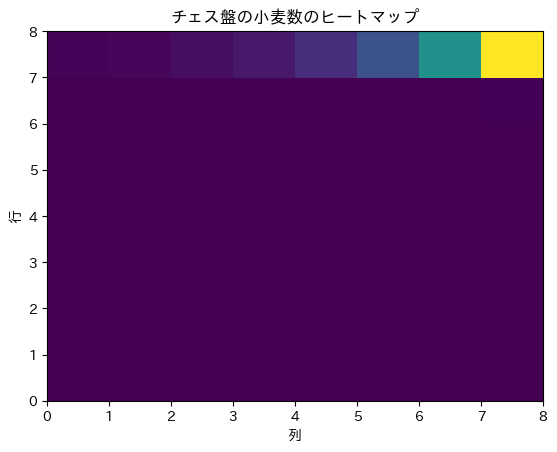

In [72]:
plt.xlabel("列")
plt.ylabel("行")
plt.title("チェス盤の小麦数のヒートマップ")
plt.pcolor(wheats)
plt.show()

【問題5】後半は前半の何倍か

In [80]:
A_half=np.sum(wheats[:4])
B_half=np.sum(wheats[4:])

print(f"チェス盤の後半にある小麦の数は前半にある小麦の数の{B_half/A_half:,}倍")

チェス盤の後半にある小麦の数は前半にある小麦の数の4,294,967,296.0倍


他の計算方法

In [105]:
# 《サンプルコード（np.append()）》
n_squares = 64
## オーバーフローによるマイナス値防止：uint64
small_board_ndarray = np.array([1]).astype(np.uint64)
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("64マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))
 # -9223372036854775808：オーバーフローによるマイナス
print("最後のマスの小麦の数：{}".format(small_board_ndarray[-1])) 

64マスの板に小麦を並べる（ndarray）：[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]


In [100]:
# 《サンプルコード（ブロードキャスト）》
# ①コードが短くなるため、実行速度が早くなる
# ②メモリの使用量を節約できる。
n_squares = 64
## オーバーフローによるマイナス値防止：uint64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
small_board_ndarray = 2**indices_of_squares # ブロードキャスト
print("64マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))
 # -9223372036854775808：オーバーフローによるマイナス
print("最後のマスの小麦の数：{}".format(small_board_ndarray[-1]))

64マスの板に小麦を並べる（ndarray）：[                  1                   2                   4
                   8                  16                  32
                  64                 128                 256
                 512                1024                2048
                4096                8192               16384
               32768               65536              131072
              262144              524288             1048576
             2097152             4194304             8388608
            16777216            33554432            67108864
           134217728           268435456           536870912
          1073741824          2147483648          4294967296
          8589934592         17179869184         34359738368
         68719476736        137438953472        274877906944
        549755813888       1099511627776       2199023255552
       4398046511104       8796093022208      17592186044416
      35184372088832      70368744177664     140737488355328
 

【問題6】他の計算方法によるn×mマスへの拡張

In [125]:
# 《np.append()》
def chessandwheatA(n,m):
    """n×mマスのチェス盤の小麦の数の計算関数。

    Parameteres
    -----------
    n : int
        チェス盤の行
    m : int
        チェス盤の列

    Returns
    -------
    small_board_ndarray : int
        チェス盤の小麦の数(リスト)
    """
    n_squares = n * m
    small_board_list = np.array([1]).astype(np.uint64)
    for _ in range(n_squares - 1):
        small_board_list = np.append(small_board_list, 2*small_board_list[-1])
    small_board_ndarray = np.array(small_board_list)
    small_board_ndarray = small_board_ndarray.reshape([n, m])
    # print(f"{n}*{m}マスの板に小麦を並べる（ndarray）：\n{small_board_ndarray}")
    return small_board_ndarray

In [127]:
print(f"小麦の数：{chessandwheatA(8,8)}")

小麦の数：[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e

In [128]:
# 《ブロードキャスト》
def chessandwheatB(n,m):
    """n×mマスのチェス盤の小麦の数の計算関数。

    Parameteres
    -----------
    n : int
        チェス盤の行
    m : int
        チェス盤の列

    Returns
    -------
    small_board_ndarray : int
        チェス盤の小麦の数(リスト)
    """
    n_squares = n * m
    small_board_list = np.arange(n_squares).astype(np.uint64)
    small_board_list = 2*small_board_list
    # print(f"{n}*{m}マスの板に小麦を並べる（ndarray）：\n{small_board_ndarray}")
    return small_board_ndarray

In [129]:
print(f"小麦の数：{chessandwheatB(8,8)}")

小麦の数：[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
 1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02
 2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
 4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04
 6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
 1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06
 1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09
 4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11
 1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14
 2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16
 7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]


【問題7】計算時間の比較

In [143]:
# append()
%%timeit
chessandwheat(8,8)

544 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [144]:
# np.append()
%%timeit
chessandwheatA(8,8)

374 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [145]:
# ブロードキャスト
%%timeit
chessandwheatB(8,8)

5.72 µs ± 1.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


ブロードキャストが圧倒的に実行時間が速い。  
ブロードキャスト＜np.append()＜append()の順